In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# SDSS Shapes Analysis

In [2]:
# open SDSS catalog

from astropy.table import Table
fpath = '../data/SDSS_Main/'
fname = 'sdss_vagc.hdf5'
t = Table.read(fpath+fname, path='data')

for colname in t.dtype.names:
    print(colname)

RA
DEC
Z
ZTYPE
FGOTMAIN
AB_DEV
AB_EXP
AB_ISO
PHI_ISO_DEG
PHI_DEV_DEG
PHI_EXP_DEG
ABSMAG_u0.1
ABSMAG_g0.1
ABSMAG_r0.1
ABSMAG_i0.1
ABSMAG_z0.1
FRACPSF


In [3]:
disks = t['FRACPSF'][:,2] < 0.8
ellipticals = t['FRACPSF'][:,2] >= 0.8

mask_1 = (t['ABSMAG_r0.1'] > -18) & (t['ABSMAG_r0.1'] <= -17)
mask_2 = (t['ABSMAG_r0.1'] > -19) & (t['ABSMAG_r0.1'] <= -18)
mask_3 = (t['ABSMAG_r0.1'] > -20) & (t['ABSMAG_r0.1'] <= -19)
mask_4 = (t['ABSMAG_r0.1'] > -21) & (t['ABSMAG_r0.1'] <= -20)
mask_5 = (t['ABSMAG_r0.1'] > -22) & (t['ABSMAG_r0.1'] <= -21)
mask_6 = (t['ABSMAG_r0.1'] > -23) & (t['ABSMAG_r0.1'] <= -22)

N_1, N_2, N_3, N_4, N_5, N_6 = np.sum(mask_1), np.sum(mask_2), np.sum(mask_3), np.sum(mask_4), np.sum(mask_5) ,np.sum(mask_5)
print(N_1, N_2, N_3, N_4, N_5, N_6)

16205 40464 111172 187776 142809 142809


In [4]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Ob0=0.05, Tcmb0=2.7255)

vmax = cosmo.comoving_volume(t['Z']).value
vmax = vmax/np.mean(vmax)

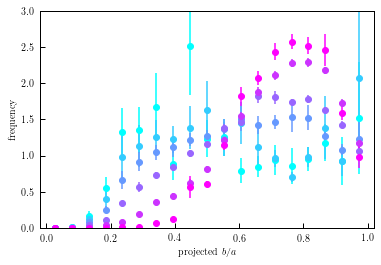

In [50]:
bins = np.linspace(0,1,20)
bin_centers = (bins[:-1]+bins[1:])/2.0

shape_key = 'AB_ISO'  # AB_EXP AB_DEV AB_ISO

x_1 = t[shape_key][mask_1]
x_2 = t[shape_key][mask_2]
x_3 = t[shape_key][mask_3]
x_4 = t[shape_key][mask_4]
x_5 = t[shape_key][mask_5]
x_6 = t[shape_key][mask_6]

w_1 = 1.0/(t['FGOTMAIN'][mask_1]*vmax[mask_1])
w_2 = 1.0/(t['FGOTMAIN'][mask_2]*vmax[mask_2])
w_3 = 1.0/(t['FGOTMAIN'][mask_3]*vmax[mask_3])
w_4 = 1.0/(t['FGOTMAIN'][mask_4]*vmax[mask_4])
w_5 = 1.0/(t['FGOTMAIN'][mask_5]*vmax[mask_5])
w_6 = 1.0/(t['FGOTMAIN'][mask_6]*vmax[mask_6])

y_1, y_err_1 = bootstrap_measurement(x_1, bins, weights=w_1, Nboot=100)
y_2, y_err_2 = bootstrap_measurement(x_2, bins, weights=w_2, Nboot=100)
y_3, y_err_3 = bootstrap_measurement(x_3, bins, weights=w_3, Nboot=100)
y_4, y_err_4 = bootstrap_measurement(x_4, bins, weights=w_4, Nboot=100)
y_5, y_err_5 = bootstrap_measurement(x_5, bins, weights=w_5, Nboot=100)
y_6, y_err_6 = bootstrap_measurement(x_6, bins, weights=w_6, Nboot=100)

colors = plt.cm.cool(np.linspace(0,1,6))

plt.figure()
plt.errorbar(bin_centers, y_1, y_err_1, fmt='o', color=colors[0])
plt.errorbar(bin_centers, y_2, y_err_2, fmt='o', color=colors[1])
plt.errorbar(bin_centers, y_3, y_err_3, fmt='o', color=colors[2])
plt.errorbar(bin_centers, y_4, y_err_4, fmt='o', color=colors[3])
plt.errorbar(bin_centers, y_5, y_err_5, fmt='o', color=colors[4])
plt.errorbar(bin_centers, y_6, y_err_6, fmt='o', color=colors[5])
plt.xlabel(r'projected $b/a$')
plt.ylabel(r'frequency')
plt.ylim([0,3])
plt.show()

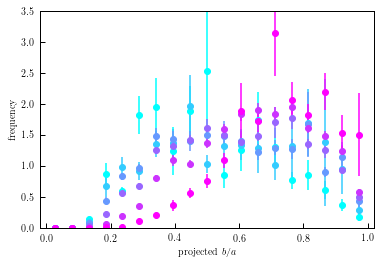

In [55]:
bins = np.linspace(0,1,20)
bin_centers = (bins[:-1]+bins[1:])/2.0

shape_key = 'AB_EXP'  # AB_EXP AB_DEV AB_ISO

x_1 = t[shape_key][mask_1 & disks]
x_2 = t[shape_key][mask_2 & disks]
x_3 = t[shape_key][mask_3 & disks]
x_4 = t[shape_key][mask_4 & disks]
x_5 = t[shape_key][mask_5 & disks]
x_6 = t[shape_key][mask_6 & disks]

w_1 = 1.0/(t['FGOTMAIN'][mask_1 & disks] * vmax[mask_1 & disks])
w_2 = 1.0/(t['FGOTMAIN'][mask_2 & disks] * vmax[mask_2 & disks])
w_3 = 1.0/(t['FGOTMAIN'][mask_3 & disks] * vmax[mask_3 & disks])
w_4 = 1.0/(t['FGOTMAIN'][mask_4 & disks] * vmax[mask_4 & disks])
w_5 = 1.0/(t['FGOTMAIN'][mask_5 & disks] * vmax[mask_5 & disks])
w_6 = 1.0/(t['FGOTMAIN'][mask_6 & disks] * vmax[mask_6 & disks])

y_1, y_err_1 = bootstrap_measurement(x_1, bins, weights=w_1, Nboot=100)
y_2, y_err_2 = bootstrap_measurement(x_2, bins, weights=w_2, Nboot=100)
y_3, y_err_3 = bootstrap_measurement(x_3, bins, weights=w_3, Nboot=100)
y_4, y_err_4 = bootstrap_measurement(x_4, bins, weights=w_4, Nboot=100)
y_5, y_err_5 = bootstrap_measurement(x_5, bins, weights=w_5, Nboot=100)
y_6, y_err_6 = bootstrap_measurement(x_6, bins, weights=w_6, Nboot=100)

colors = plt.cm.cool(np.linspace(0,1,6))

plt.figure()
plt.errorbar(bin_centers, y_1, y_err_1, fmt='o', color=colors[0])
plt.errorbar(bin_centers, y_2, y_err_2, fmt='o', color=colors[1])
plt.errorbar(bin_centers, y_3, y_err_3, fmt='o', color=colors[2])
plt.errorbar(bin_centers, y_4, y_err_4, fmt='o', color=colors[3])
plt.errorbar(bin_centers, y_5, y_err_5, fmt='o', color=colors[4])
plt.errorbar(bin_centers, y_6, y_err_6, fmt='o', color=colors[5])
plt.xlabel(r'projected $b/a$')
plt.ylabel(r'frequency')
plt.ylim([0,3.5])
plt.show()

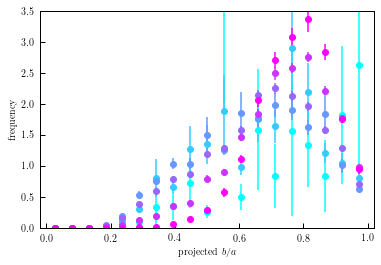

In [56]:
bins = np.linspace(0,1,20)
bin_centers = (bins[:-1]+bins[1:])/2.0

shape_key = 'AB_DEV'  # AB_EXP AB_DEV AB_ISO

x_1 = t[shape_key][mask_1 & ellipticals]
x_2 = t[shape_key][mask_2 & ellipticals]
x_3 = t[shape_key][mask_3 & ellipticals]
x_4 = t[shape_key][mask_4 & ellipticals]
x_5 = t[shape_key][mask_5 & ellipticals]
x_6 = t[shape_key][mask_6 & ellipticals]

w_1 = 1.0/(t['FGOTMAIN'][mask_1 & ellipticals] * vmax[mask_1 & ellipticals])
w_2 = 1.0/(t['FGOTMAIN'][mask_2 & ellipticals] * vmax[mask_2 & ellipticals])
w_3 = 1.0/(t['FGOTMAIN'][mask_3 & ellipticals] * vmax[mask_3 & ellipticals])
w_4 = 1.0/(t['FGOTMAIN'][mask_4 & ellipticals] * vmax[mask_4 & ellipticals])
w_5 = 1.0/(t['FGOTMAIN'][mask_5 & ellipticals] * vmax[mask_5 & ellipticals])
w_6 = 1.0/(t['FGOTMAIN'][mask_6 & ellipticals] * vmax[mask_6 & ellipticals])

y_1, y_err_1 = bootstrap_measurement(x_1, bins, weights=w_1, Nboot=100)
y_2, y_err_2 = bootstrap_measurement(x_2, bins, weights=w_2, Nboot=100)
y_3, y_err_3 = bootstrap_measurement(x_3, bins, weights=w_3, Nboot=100)
y_4, y_err_4 = bootstrap_measurement(x_4, bins, weights=w_4, Nboot=100)
y_5, y_err_5 = bootstrap_measurement(x_5, bins, weights=w_5, Nboot=100)
y_6, y_err_6 = bootstrap_measurement(x_6, bins, weights=w_6, Nboot=100)

colors = plt.cm.cool(np.linspace(0,1,6))

plt.figure()
plt.errorbar(bin_centers, y_1, y_err_1, fmt='o', color=colors[0])
plt.errorbar(bin_centers, y_2, y_err_2, fmt='o', color=colors[1])
plt.errorbar(bin_centers, y_3, y_err_3, fmt='o', color=colors[2])
plt.errorbar(bin_centers, y_4, y_err_4, fmt='o', color=colors[3])
plt.errorbar(bin_centers, y_5, y_err_5, fmt='o', color=colors[4])
plt.errorbar(bin_centers, y_6, y_err_6, fmt='o', color=colors[5])
plt.xlabel(r'projected $b/a$')
plt.ylabel(r'frequency')
plt.ylim([0,3.5])
plt.show()

In [16]:
def bootstrap_measurement(x, bins, weights=None, Nboot=100):
    """
    """
    N = len(x)
    
    if weights is None:
        weights = np.ones(N)
    
    inds = np.arange(0,N)
    
    f = np.zeros((Nboot, len(bins)-1))
    for i in range(0,Nboot):
        idx = np.random.choice(inds, size=N, replace=True)
        xx = x[idx]
        ww = weights[idx]
        counts = np.histogram(xx, weights=ww, bins=bins)[0]
        f[i,:] = 1.0*counts/np.sum(ww)/np.diff(bins)
    
    return np.mean(f, axis=0), np.std(f, axis=0)

In [5]:
bins = np.linspace(-24, -17, 35)
bin_centers = (bins[:-1]+bins[1:])/2.0

w = 1.0/(t['FGOTMAIN'] * vmax)
counts_disks = np.histogram(t['ABSMAG_r0.1'][disks], bins=bins, weights=w[disks])[0]
counts_total = np.histogram(t['ABSMAG_r0.1'], bins=bins, weights=w)[0]

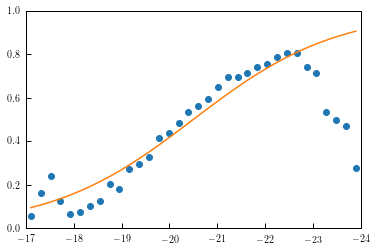

In [7]:
from galaxy_shapes.shape_models.morphology_model_components import Morphology_2
morphology_model = Morphology_2()
morphology_model.param_dict['morphology_sigma'] = 1.5
morphology_model.param_dict['morphology_m0'] = -20.5

plt.plot(bin_centers, 1-counts_disks/counts_total, 'o')
plt.plot(bin_centers, 1-morphology_model.disk_fraction(bin_centers))
plt.xlim([-17,-24])
plt.ylim([0,1])
plt.show()